#         Handwritten digits classification using neural network
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers.

We will than add a hidden layer and see how the performance of the model improves

In [7]:
## importing reaquired libraries 

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
# Load the minst data and split into train and test data manually

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [9]:
len(X_train)  # length of the X_train  is 60000

60000

In [10]:
len(X_test)   #Length of the X_test is 10000

10000

In [11]:
X_train[0].shape   #size of the each individual sample or data in pixcle is 28*28

(28, 28)

In [12]:
X_train[0]        #Matrix representation the first image total 728 values

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

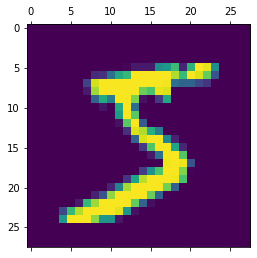

In [13]:
plt.matshow(X_train[0])        # seeing the first image in the X_train dataset 

In [14]:
y_train[0]                    #seeing the first image in y_train dataset

5

In [15]:
# Standadised the values of our train and test data otherwise we loose our accuracy
# becasuse the difference in the pixelvalues
X_train = X_train / 255
X_test = X_test / 255

In [16]:
X_train[0]  # all the pixcel values changed between o and 1   here total 28 arrays or matrixs for single data 

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
#convert the 28*28 pixcel or grid into single matrix or array 
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [18]:
X_train_flattened.shape   

(60000, 784)

In [19]:
X_train_flattened[0]   #Here only one matrix or array for single data 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
#Building the sequential model with no hidden layers

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [40]:
# fitting the model on train data
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 660us/step - loss: 0.2615 - accuracy: 0.9277
Epoch 2/5
1875/1875 [==============================] - 1s 585us/step - loss: 0.2580 - accuracy: 0.9283
Epoch 3/5
1875/1875 [==============================] - 1s 587us/step - loss: 0.2557 - accuracy: 0.9288
Epoch 4/5
1875/1875 [==============================] - 1s 588us/step - loss: 0.2529 - accuracy: 0.9293
Epoch 5/5
1875/1875 [==============================] - 1s 591us/step - loss: 0.2511 - accuracy: 0.9305


In [41]:
#Evaluate the model on the test data 
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 464us/step - loss: 0.2630 - accuracy: 0.9262


[0.2630375623703003, 0.9261999726295471]

In [37]:
# prediction based on our model 
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

array([5.0464904e-01, 8.1551969e-03, 9.9949974e-01, 4.6369451e-01,
       8.2133683e-10, 9.1677487e-01, 8.8574129e-01, 1.8338755e-12,
       2.3834479e-01, 2.5918918e-09], dtype=float32)

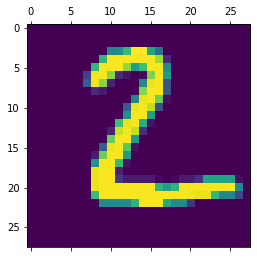

In [38]:
plt.matshow(X_test[1])

np.argmax finds a maximum element from an array and returns the index of it

In [39]:
np.argmax(y_predicted[1])

2

In [25]:

y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [26]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,    7,  938,   13,    8,    4,   11,   10,   35,    3],
       [   3,    0,   22,  921,    0,   20,    2,   10,   23,    9],
       [   2,    1,    5,    2,  908,    0,    8,    4,   10,   42],
       [   9,    2,    4,   30,    8,  781,   15,    6,   30,    7],
       [  10,    3,    7,    1,    7,   11,  913,    2,    4,    0],
       [   1,    5,   22,    7,    4,    1,    0,  946,    4,   38],
       [   6,    6,    7,   18,    9,   24,    8,    9,  879,    8],
       [  11,    7,    1,   11,   24,    5,    0,   19,    8,  923]])>

Text(69.0, 0.5, 'Truth')

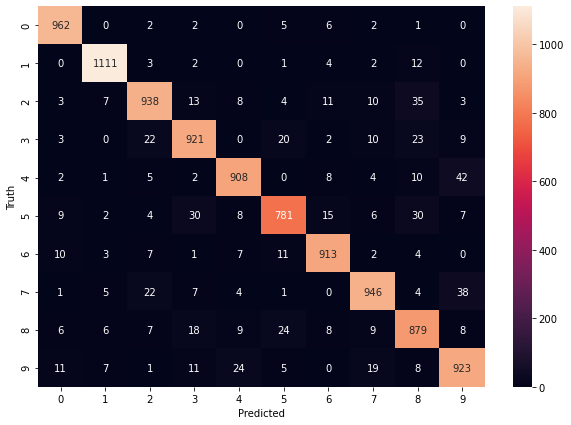

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using hidden layer

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 668us/step - loss: 0.2673 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 1s 644us/step - loss: 0.1208 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 1s 652us/step - loss: 0.0843 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 1s 651us/step - loss: 0.0648 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 1s 643us/step - loss: 0.0514 - accuracy: 0.9840


In [30]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 563us/step - loss: 0.0899 - accuracy: 0.9735


[0.08991255611181259, 0.9735000133514404]

Text(69.0, 0.5, 'Truth')

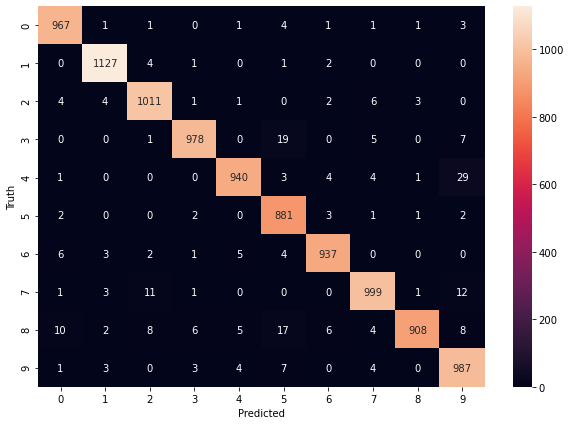

In [31]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 660us/step - loss: 0.2751 - accuracy: 0.9217
Epoch 2/10
1875/1875 [==============================] - 1s 650us/step - loss: 0.1255 - accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 1s 639us/step - loss: 0.0886 - accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 1s 647us/step - loss: 0.0667 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 1s 636us/step - loss: 0.0528 - accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 1s 649us/step - loss: 0.0419 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 1s 697us/step - loss: 0.0342 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 1s 739us/step - loss: 0.0282 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 1s 657us/step - loss: 0.0238 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 1s 652u

In [34]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 567us/step - loss: 0.0784 - accuracy: 0.9762


[0.07838165014982224, 0.9761999845504761]

In [66]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 2s 816us/step - loss: 0.2343 - accuracy: 0.9324
Epoch 2/15
1875/1875 [==============================] - 2s 803us/step - loss: 0.0968 - accuracy: 0.9714
Epoch 3/15
1875/1875 [==============================] - 2s 801us/step - loss: 0.0660 - accuracy: 0.9799
Epoch 4/15
1875/1875 [==============================] - 2s 810us/step - loss: 0.0473 - accuracy: 0.9851
Epoch 5/15
1875/1875 [==============================] - 2s 806us/step - loss: 0.0354 - accuracy: 0.9888
Epoch 6/15
1875/1875 [==============================] - 2s 800us/step - loss: 0.0277 - accuracy: 0.9916
Epoch 7/15
1875/1875 [==============================] - 2s 802us/step - loss: 0.0215 - accuracy: 0.9934
Epoch 8/15
1875/1875 [==============================] - 2s 800us/step - loss: 0.0174 - accuracy: 0.9948
Epoch 9/15
1875/1875 [==============================] - 1s 799us/step - loss: 0.0137 - accuracy: 0.9955
Epoch 10/15
1875/1875 [==============================] - 2s 813u

In [68]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 567us/step - loss: 0.1058 - accuracy: 0.9784


[0.10581772774457932, 0.9783999919891357]

Text(69.0, 0.5, 'Truth')

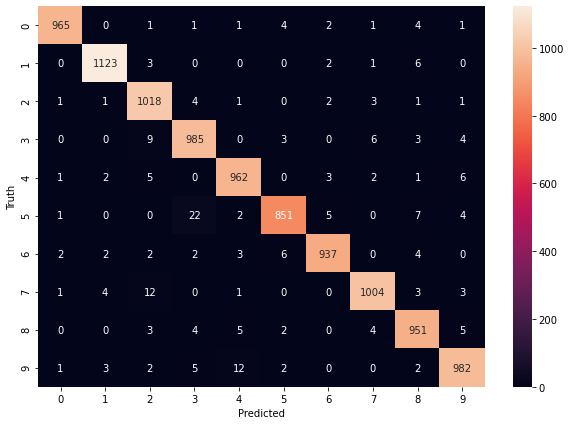

In [69]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
from sklearn.metrics import classification_report

In [71]:
print('Classification Report:')
print(classification_report(y_test,y_predicted_labels ))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.95      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

